In [1]:
import pandas as pd
import geopandas as gpd
import zipfile
import pylab as pl
import os
import sklearn.cluster as cluster
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### 1. Get and prep your data

In [2]:
os.chdir(os.getenv("PUIDATA"))

In [3]:
if os.path.isfile(os.getenv("PUIDATA") + '/ZIP_CODE_040114.zip'):
    print("Data already there!")
else:
    os.system("curl -LJO " + 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip')
    os.system("unzip " + os.getenv("PUIDATA") + '/ZIP_CODE_040114.zip')

Data already there!


In [4]:
zip_shape = gpd.read_file('ZIP_CODE_040114.shp')

In [5]:
file_numbers = ["%.2d" % i for i in range(15)]
file_numbers = file_numbers + ["%.2d" % i for i in range(94,100)]

In [6]:
zip_files = []
file_extensions = []
for number in file_numbers:
    file_name = 'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp{}totals.zip'.format(number)
    file_extension = 'zbp{}totals.zip'.format(number)
    zip_files.append(file_name)
    file_extensions.append(file_extension)

In [7]:
for file in zip_files:    
    if os.path.isfile(os.getenv("PUIDATA") + "/" + file[-15:]):
        print("Data already there!")
    else:
        os.system("curl -LJO " + file)
        #os.system("unzip " + os.getenv("PUIDATA") + "/" + file[-15:])

Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!
Data already there!


In [8]:
df_dict = {}
for file_extension in file_extensions:
    zf = zipfile.ZipFile(file_extension)
    file_name = file_extension[0:5]
    df_dict[file_name] = pd.read_csv(zf.open(file_extension.replace('.zip','.txt')))

In [9]:
#add year to the dataframes
for key, frame in df_dict.items():
    if key[-2:-1] == '0':
        frame['year'] = "20" + key[-2:]
    elif key[-2:-1] == '1':
        frame['year'] = '20' + key[-2:]
    elif key[-2:-1] == '9':
        frame['year'] = "19" + key[-2:]

In [10]:
for key, frame in df_dict.items():
    frame.columns = frame.columns.str.lower()


In [11]:
all_years = pd.concat(df_dict.values(), ignore_index=True)

In [12]:
all_years.head()
#think this is from this dataset
#https://api.census.gov/data/2016/zbp/variables.html

,ap,ap_nf,city,cty_name,emp,emp_nf,empflag,est,name,qp1,qp1_nf,stabbr,year,zip
0,0,D,HOLTSVILLE,SUFFOLK,0,D,A,2,"HOLTSVILLE, NY",0,D,NY,2010,501
1,314508,G,AGAWAM,HAMPDEN,9185,G,NaN,448,"AGAWAM, MA",70693,G,MA,2010,1001
2,351589,G,AMHERST,HAMPSHIRE,15633,G,NaN,570,"AMHERST, MA",82069,G,MA,2010,1002
3,5761,H,AMHERST,HAMPSHIRE,168,G,NaN,16,"AMHERST, MA",1297,H,MA,2010,1003
4,7241,H,AMHERST,HAMPSHIRE,189,H,NaN,21,"AMHERST, MA",1710,H,MA,2010,1004


In [13]:
columns_realnames = ['annual_pay', 'annual_pay_noise_field_flag','city','county_name','total_employees','employee_noise_field_flag',
                     'employee_number_flag','total_establishments','city_state_name','total_first_quarter_payroll',
                    'first_quarter_payroll_noise_field_flag','state','year','zip']

In [14]:
all_years.columns = columns_realnames

In [15]:
all_years.head()

,annual_pay,annual_pay_noise_field_flag,city,county_name,total_employees,employee_noise_field_flag,employee_number_flag,total_establishments,city_state_name,total_first_quarter_payroll,first_quarter_payroll_noise_field_flag,state,year,zip
0,0,D,HOLTSVILLE,SUFFOLK,0,D,A,2,"HOLTSVILLE, NY",0,D,NY,2010,501
1,314508,G,AGAWAM,HAMPDEN,9185,G,NaN,448,"AGAWAM, MA",70693,G,MA,2010,1001
2,351589,G,AMHERST,HAMPSHIRE,15633,G,NaN,570,"AMHERST, MA",82069,G,MA,2010,1002
3,5761,H,AMHERST,HAMPSHIRE,168,G,NaN,16,"AMHERST, MA",1297,H,MA,2010,1003
4,7241,H,AMHERST,HAMPSHIRE,189,H,NaN,21,"AMHERST, MA",1710,H,MA,2010,1004


In [16]:
all_years.groupby('year').count()

,annual_pay,annual_pay_noise_field_flag,city,county_name,total_employees,employee_noise_field_flag,employee_number_flag,total_establishments,city_state_name,total_first_quarter_payroll,first_quarter_payroll_noise_field_flag,state,zip
year,,,,,,,,,,,,,
1994,39259,0,0,0,39259,0,6637,39259,39259,39259,0,0,39259
1995,39932,0,0,0,39932,0,5858,39932,39932,39932,0,0,39932
1996,40099,0,0,0,40099,0,5169,40099,40099,40099,0,0,40099
1997,40248,0,0,0,40248,0,5446,40248,40248,40248,0,0,40248
1998,39467,0,0,0,39467,0,5770,39467,39467,39467,0,0,39467
1999,39761,0,0,0,39761,0,5399,39761,39761,39761,0,0,39761
2000,39853,0,0,0,39853,0,5577,39853,39853,39853,0,0,39853
2001,39817,0,0,0,39817,0,5473,39817,39817,39817,0,0,39817
2002,39451,0,0,0,39451,0,5947,39451,39451,39451,0,0,39451


In [17]:
#filter to columns of interest
all_years = all_years[['zip','year','total_establishments']]
all_years.drop_duplicates(inplace=True)
all_years.dropna(axis=0, inplace=True)

In [18]:
all_years.groupby('year').count()

,zip,total_establishments
year,,
1994,39259,39259
1995,39931,39931
1996,40099,40099
1997,40248,40248
1998,39467,39467
1999,39761,39761
2000,39853,39853
2001,39817,39817
2002,39451,39451


In [19]:
all_years.dtypes

zip                      int64
year                    object
total_establishments     int64
dtype: object

In [20]:
zip_shape.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

In [21]:
#fix zipcode on zip_shape so it is also an integer
zip_shape['ZIPCODE'] = zip_shape.ZIPCODE.astype(int)

In [22]:
#get zip code values from zip file and use to filter dataframe
zip_filter = list(zip_shape.ZIPCODE.values)
all_years_nyc = all_years[all_years['zip'].isin(zip_filter)]

In [23]:
all_years_nyc.head()

,zip,year,total_establishments
2925,10001,2010,7241
2926,10002,2010,2872
2927,10003,2010,4113
2928,10004,2010,1398
2929,10005,2010,1266


In [24]:
#drop nans
all_years_nyc.dropna(axis=0, how='any', inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
cluster_data = all_years_nyc.pivot(index='zip', columns='year', values='total_establishments')

In [26]:
cluster_data.shape

(245, 21)

In [27]:
#check out missing values and then deal with them
cluster_data[cluster_data.isnull().sum(axis=1) > 0]

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10045,2.0,2.0,2.0,1.0,1.0,NaN,2.0,2.0,2.0,1.0,...,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,5.0
10047,5.0,4.0,3.0,3.0,3.0,NaN,4.0,2.0,2.0,2.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10048,964.0,990.0,1008.0,993.0,1235.0,1173.0,1254.0,1030.0,193.0,103.0,...,69.0,62.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,85.0,836.0,954.0,1037.0,1137.0,1242.0,1393.0,1446.0,1493.0
10069,NaN,NaN,NaN,NaN,6.0,12.0,11.0,16.0,33.0,37.0,...,43.0,49.0,56.0,67.0,73.0,82.0,84.0,89.0,90.0,100.0
10075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,51.0,465.0,519.0,556.0,617.0,703.0,824.0,850.0,873.0
10096,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
10196,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10203,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0


In [28]:
cluster_data[(cluster_data.isnull().sum(axis=1) > 3) & (cluster_data.std(axis=1) < 5)] = cluster_data[
    (cluster_data.isnull().sum(axis=1) > 3) & (cluster_data.std(axis=1) < 5)].T.fillna(cluster_data.mean(axis=1)).T

In [29]:
cluster_data[(cluster_data.isnull().sum(axis=1) < 3) & (cluster_data.isnull().sum(axis=1) > 0)] = cluster_data[
    (cluster_data.isnull().sum(axis=1) < 3) & (cluster_data.isnull().sum(axis=1) > 0)].interpolate(method='linear', axis=1)

In [30]:
cluster_data[(cluster_data.isnull().sum(axis=1) < 3) & (cluster_data.isnull().sum(axis=1) > 0)] = cluster_data[
    (cluster_data.isnull().sum(axis=1) < 3) & (cluster_data.isnull().sum(axis=1) > 0)].fillna(value=1)

In [31]:
cluster_data[(cluster_data.isnull().sum(axis=1) > 0)]

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,
10048,964.0,990.0,1008.0,993.0,1235.0,1173.0,1254.0,1030.0,193.0,103.0,...,69.0,62.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,85.0,836.0,954.0,1037.0,1137.0,1242.0,1393.0,1446.0,1493.0
10069,NaN,NaN,NaN,NaN,6.0,12.0,11.0,16.0,33.0,37.0,...,43.0,49.0,56.0,67.0,73.0,82.0,84.0,89.0,90.0,100.0
10075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,51.0,465.0,519.0,556.0,617.0,703.0,824.0,850.0,873.0
10260,15.0,15.0,21.0,24.0,25.0,23.0,26.0,27.0,27.0,21.0,...,10.0,7.0,6.0,4.0,3.0,3.0,4.0,NaN,NaN,NaN
11249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,30.0,114.0,361.0,480.0,590.0


In [32]:
cluster_data.dropna(axis=0, how='any', inplace=True)

In [33]:
cluster_data[(cluster_data.isnull().sum(axis=1) > 0)]

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
zip,,,,,,,,,,,,,,,,,,,,,


In [34]:
mean = cluster_data.mean(axis=1)

In [35]:
std = cluster_data.std(axis=1)

In [36]:
values = (cluster_data.sub(mean, axis=0)).divide(std, axis=0)

In [37]:
values.dropna(axis=0, how='any', inplace=True)

In [38]:
values.mean(axis=1)

zip
10001   -9.251859e-16
10002    2.220446e-16
10003   -5.286776e-17
10004   -1.691768e-16
10005   -1.776357e-15
10006    1.057355e-17
10007   -5.498247e-16
10009    1.586033e-16
10010    2.960595e-16
10011   -1.173664e-15
10012    1.020348e-15
10013    1.928021e-16
10014   -4.335157e-16
10016   -1.875484e-15
10017   -8.353107e-16
10018    1.374562e-15
10019    7.137148e-16
10020    6.396999e-16
10021    3.277801e-16
10022    1.215959e-15
10023    1.533165e-15
10024    0.000000e+00
10025   -6.344132e-17
10026    9.516197e-17
10027   -2.326182e-16
10028    9.529414e-16
10029   -8.458842e-17
10030   -2.326182e-16
10031    2.749124e-16
10032   -3.172066e-16
             ...     
11385   -6.344132e-17
11411   -4.758099e-16
11412   -3.172066e-16
11413    2.008975e-16
11414   -1.839798e-15
11415   -6.132661e-16
11416   -7.718693e-16
11417    4.229421e-17
11418    8.035900e-16
11419   -5.286776e-17
11420    5.286776e-17
11421    3.383537e-16
11422    8.670313e-16
11423   -1.691768e-16
11426 

In [39]:
values.mean(axis=1).shape

(237,)

In [40]:
values.std(axis=1)

zip
10001    1.0
10002    1.0
10003    1.0
10004    1.0
10005    1.0
10006    1.0
10007    1.0
10009    1.0
10010    1.0
10011    1.0
10012    1.0
10013    1.0
10014    1.0
10016    1.0
10017    1.0
10018    1.0
10019    1.0
10020    1.0
10021    1.0
10022    1.0
10023    1.0
10024    1.0
10025    1.0
10026    1.0
10027    1.0
10028    1.0
10029    1.0
10030    1.0
10031    1.0
10032    1.0
        ... 
11385    1.0
11411    1.0
11412    1.0
11413    1.0
11414    1.0
11415    1.0
11416    1.0
11417    1.0
11418    1.0
11419    1.0
11420    1.0
11421    1.0
11422    1.0
11423    1.0
11426    1.0
11427    1.0
11428    1.0
11429    1.0
11430    1.0
11432    1.0
11433    1.0
11434    1.0
11435    1.0
11436    1.0
11451    1.0
11691    1.0
11692    1.0
11693    1.0
11694    1.0
11697    1.0
dtype: float64

In [41]:
values.std(axis=1).shape

(237,)

### 2. Cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters 
(as discussed there is no real good, sound way to decide what a good number is here. Try a few options, keeping in mind a few is more than a couple, but I recommand you stay within the single digit numbers).

In [42]:
#try out the cluster!
km4 = cluster.KMeans(n_clusters=4, random_state=444).fit(values)

In [43]:
km4.labels_

array([0, 2, 2, 2, 0, 3, 0, 2, 3, 2, 0, 3, 0, 3, 3, 2, 3, 0, 3, 3, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 3, 2, 2, 1, 0, 3, 3,
       1, 3, 1, 1, 1, 1, 3, 3, 0, 2, 3, 2, 1, 3, 3, 3, 0, 3, 3, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 3, 3, 2, 1, 3, 2, 3, 1, 1, 1, 3, 3, 0, 1, 0, 0, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0], dtype=int32)

In [44]:
for item in km4.cluster_centers_:
    print(item.mean())

1.58603289232e-17
-4.22942104619e-17
4.22942104619e-17
-6.34413156929e-17


In [45]:
values['km4'] = km4.labels_

In [46]:
values.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,km4
zip,,,,,,,,,,,,,,,,,,,,,
10001,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,0
10002,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,2
10003,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,2
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,2
10005,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,0


In [47]:
#try out the cluster again!
km5 = cluster.KMeans(n_clusters=5, random_state=444).fit(values)
km6 = cluster.KMeans(n_clusters=6, random_state=444).fit(values)
km7 = cluster.KMeans(n_clusters=7, random_state=444).fit(values)

In [48]:
values['km5'] = km5.labels_
values['km6'] = km6.labels_
values['km7'] = km7.labels_

In [49]:
values.head()

year,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,km4,km5,km6,km7
zip,,,,,,,,,,,,,,,,,,,,,
10001,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,...,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,0,3,0,3
10002,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,...,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,2,0,2,0
10003,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,...,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,2,0,2,0
10004,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,...,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,2,0,2,0
10005,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,...,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,0,3,0,3


### 3. Plot the cluster centers 
(if you used K means those are the means of 
the clusters). you can plot for example the cluster centers overlayed on 
each time series (using the alpha channel to control the opacity in the 
plot may be helpful here).

In [50]:
km_dict = {}
cluster_list = [4,5,6,7]

for item in cluster_list:
    name = 'km' + str(item)
    for i in range(item):
        array = values.iloc[:,0:21][values['km'+str(item)] == i].values
        km_dict[name + 'cluster' + str(i)] = array
        mean_array = values.iloc[:,0:21][values['km'+str(item)] == i].mean().values
        km_dict[name + 'cluster_mean' + str(i)] = mean_array

In [51]:
km4_keys = [key for key in km_dict.keys() if 'km4' in km_dict.keys()]

fig = plt.figure()

for key, i in zip(km4_keys, range(1,5)):
    if key.startswith('km4cluster_mean') == True:
        array = km_dict[key]
        ax = fig.add_subplot(2,2,i)
        ax.plot(array, color='red', alpha=1)
    else:
        for array_num in range(len(km_dict[key])):
            array = km_dict[key][array_num]
            ax = fig.add_subplot(2,2,i)
            ax.plot(array, color='grey', alpha=0.5)

plt.show();

In [52]:
zip_shape_merge = zip_shape.loc[:,['ZIPCODE','geometry']]
zip_shape_merge.rename(columns = {'ZIPCODE':'zip'}, inplace=True)
values_map = pd.merge(zip_shape_merge, values, left_on='zip', right_index=True)

In [53]:
type(values_map)

geopandas.geodataframe.GeoDataFrame

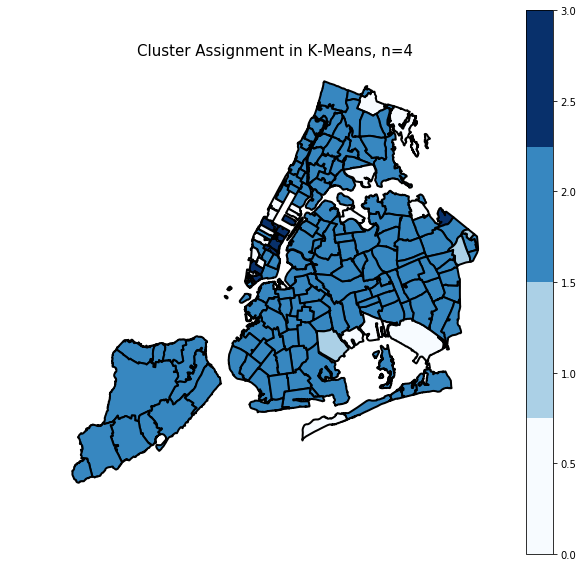

In [54]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Cluster Assignment in K-Means, n=4", fontsize=15)
cmap = plt.cm.get_cmap('Blues',4)
cm = values_map.plot(ax=ax, cmap=cmap, column='km4', edgecolor='black', lw=2, legend=True)
plt.show()

Figure showing NYC zip codes clustered by their total business establishments from 1994-2014 using the K-means algorithm, n=4.

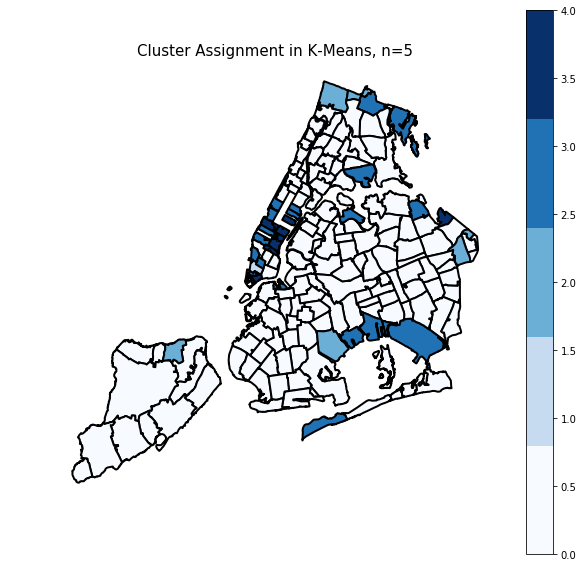

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Cluster Assignment in K-Means, n=5", fontsize=15)
cmap = plt.cm.get_cmap('Blues',5)
cm = values_map.plot(ax=ax, cmap=cmap, column='km5', edgecolor='black', lw=2, legend=True)
#cbar.ax.set_yticklabels(['Cluster1','Cluster2','Cluster3','Cluster4'])
plt.show()

Figure showing NYC zip codes clustered by their total business establishments from 1994-2014 using the K-means algorithm, n=5.

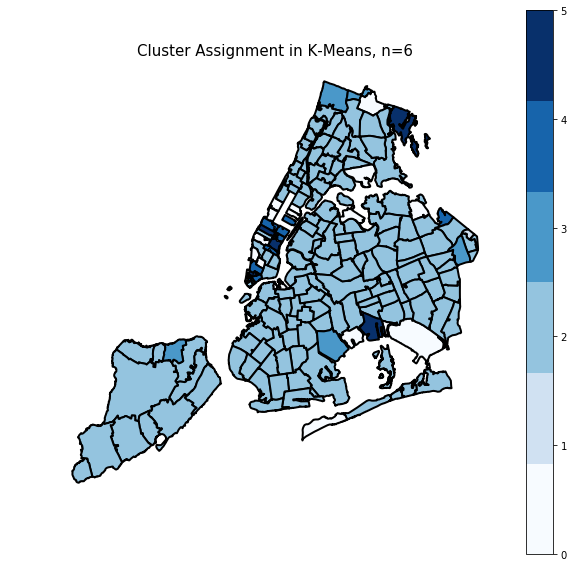

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Cluster Assignment in K-Means, n=6", fontsize=15)
cmap = plt.cm.get_cmap('Blues',6)
cm = values_map.plot(ax=ax, cmap=cmap, column='km6', edgecolor='black', lw=2, legend=True)
#cbar.ax.set_yticklabels(['Cluster1','Cluster2','Cluster3','Cluster4'])
plt.show()

Figure showing NYC zip codes clustered by their total business establishments from 1994-2014 using the K-means algorithm, n=6.

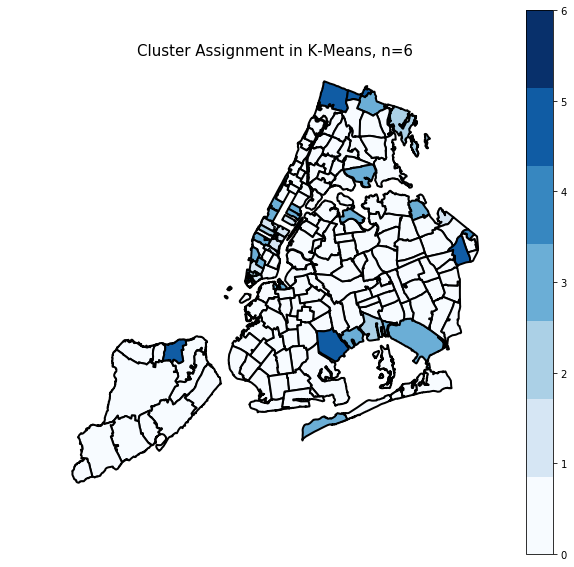

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.axis('off')
plt.title("Cluster Assignment in K-Means, n=6", fontsize=15)
cmap = plt.cm.get_cmap('Blues',7)
cm = values_map.plot(ax=ax, cmap=cmap, column='km7', edgecolor='black', lw=2, legend=True)
#cbar.ax.set_yticklabels(['Cluster1','Cluster2','Cluster3','Cluster4'])
plt.show()

Figure showing NYC zip codes clustered by their total business establishments from 1994-2014 using the K-means algorithm, n=7.